## **3-Layered Neural Network From Scratch**
***

**Name:** Jackson Zheng

In [50]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [51]:
class NeuralNetwork:
    """Vectorized Implementation of 3 layered NN with 10 hidden units.
    The log-loss function was used as the Loss function.
    
    Refer to pictures below for notation + derivations of backprop.
    Note that the notation used was taken from stanford's cs230 course:
    https://cs230.stanford.edu/files/Notation.pdf

    """

    HIDDEN_UNITS = 10
    LR = 0.5

    def __init__(self):
        data = self.load_data()
        m = data.shape[1]
        n = data.shape[0] - 1

        # Initialize Parameters
        self.initialize_params(num_features=n)

        self.m = m
        self.n = n

    def load_data(self):
        data = pd.read_pickle('backprop-data.pkl')
        labels = np.transpose(data['labels'])
        vectors = data['vectors']
        data = np.append(vectors, labels, axis=0)
        return data

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_params(self, num_features):
        """Initialize Parameters."""

        self.W = {
              "1": np.random.randn(self.HIDDEN_UNITS, num_features) * 0.1,
              "2": np.random.randn(self.HIDDEN_UNITS, self.HIDDEN_UNITS) * 0.1,
              "3": np.random.randn(1, self.HIDDEN_UNITS) * 0.1
            }

        self.b = {
              "1": np.random.randn() * 0.1,
              "2": np.random.randn() * 0.1,
              "3": np.random.randn() * 0.1,
            }

    def forward(self, X):
        """Forward Propagation"""
        # first layer
        A1 = np.tanh(self.W["1"] @ X + self.b["1"])

        # Second Layer
        A2 = np.tanh(self.W["2"] @ A1 + self.b["2"])

        # output layer
        A3 = self.sigmoid(self.W["3"] @ A2 + self.b["3"])

        A = {"1": A1, "2": A2, "3": A3}

        return A3, A

    def backward(self, X, Y, A, m):
        """Backward Propagation"""
        
        # Output layer
        dZ3 = A['3'] - Y
        dW3 = dZ3 @ A['2'].T / m
        db3 = (np.sum(dZ3)) / m

        # 2nd layer
        dZ2 = np.multiply(self.W["3"].T @ dZ3, 1 - np.square(A["2"]))
        dW2 = (dZ2 @ A["1"].T) / m
        db2 = np.sum(dZ2) / m

        # 1st Layer
        dZ1 = np.multiply(self.W["2"].T @ dZ2, 1 - np.square(A["1"]))
        dW1 = (dZ1 @ X.T) / m
        db1 = np.sum(dZ1) / m

        dW = {"1": dW1, "2": dW2, "3": dW3}
        db = {"1": db1, "2": db2, "3": db3}

        return dW, db

    def calculate_cost(self, A3, Y):
        """Used for debugging purposes. """

        m = Y.shape[1]
        return (-1 / m) * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))

    def update_params(self, dW, db):
        """Update Parameters"""

        self.W["1"] -= self.LR * dW["1"]
        self.W["2"] -= self.LR * dW["2"]
        self.W["3"] -= self.LR * dW["3"]

        self.b["1"] -= self.LR * db["1"]
        self.b["2"] -= self.LR * db["2"]
        self.b["3"] -= self.LR * db["3"]

    def train(self, num_epochs=1000, seed=0):
        """Train NN"""
        np.random.seed(seed)

        m = self.m
        n = self.n

        costs = []
        epochs = []
        # Start training loop
        for epoch in range(num_epochs):
            np.random.shuffle(data.T)
            X = data[:n, :]
            Y = data[n, :].reshape(1, -1)

            # Forward
            Y_hat, A = self.forward(X)

            # Cost
            costs.append(self.calculate_cost(Y_hat, Y))
            epochs.append(epoch)

            # Backward
            dW, db = self.backward(X, Y, A, m)

            # update parameters
            self.update_params(dW, db)

        return costs, epochs

    def predict(self, X):
        """Make Prediction."""

        A3, A = self.forward(X)
        return (A3 >= 0.5)

    def get_accuracy(self, X, Y):
        Y_hat = self.predict(X)
        return np.sum(Y == Y_hat) / Y.shape[1]


![alt text](Q3derivatives.png)

Decision Map before training

Text(0, 0.5, 'x2')

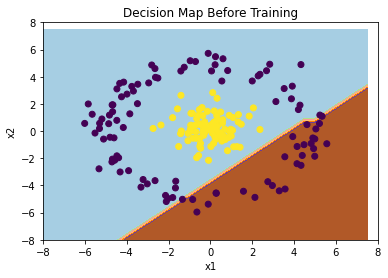

In [52]:
nn = NeuralNetwork()

# Make scatter plot of features
data = nn.load_data()
n = data.shape[0] - 1
X = data[:n, :]
Y = data[n, :].reshape(1, -1)

x, y = np.meshgrid(np.arange(-8, 8, 0.5), np.arange(-8, 8, 0.5))
r1 = x.flatten().reshape(1,-1)
r2 = y.flatten().reshape(1,-1)

Z = nn.predict(np.vstack((r1, r2))).reshape(x.shape)
plt.contourf(x, y, Z, cmap='Paired')
plt.scatter(X[0,:], X[1,:], c=Y)
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.title("Decision Map Before Training")
plt.xlabel("x1")
plt.ylabel("x2")


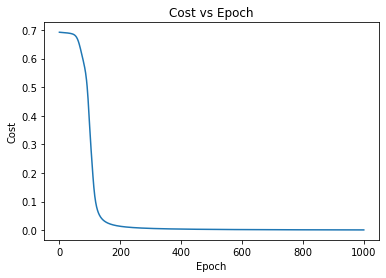

In [53]:
costs, epochs = nn.train(num_epochs=1000, seed=10)
plt.title("Cost vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epochs, costs)

Plotting the Decision Map After training

Text(0, 0.5, 'x2')

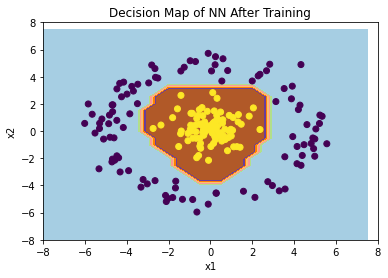

In [54]:
# Make scatter plot of features
data = nn.load_data()
n = data.shape[0] - 1
X = data[:n, :]
Y = data[n, :].reshape(1, -1)

x, y = np.meshgrid(np.arange(-8, 8, 0.5), np.arange(-8, 8, 0.5))
r1 = x.flatten().reshape(1,-1)
r2 = y.flatten().reshape(1,-1)

Z = nn.predict(np.vstack((r1, r2))).reshape(x.shape)
plt.contourf(x, y, Z, cmap='Paired')
plt.scatter(X[0,:], X[1,:], c=Y)
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.title("Decision Map of NN After Training")
plt.xlabel("x1")
plt.ylabel("x2")